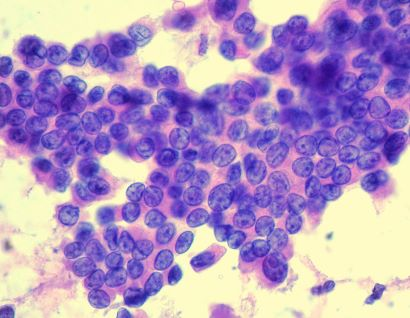

## Introduction

I have a particular interest in healthcare and clinical data having previously worked in the NHS and having completed an NVQ Level 4 in Anatomy and Physiology. 
I also have a personal interest in looking at this data as someone close to me had Thyroid Cancer which was successfully treated.

## Data Source Information

Data taken from - https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence
(Please see References for full citation)

The original data was collected as part of a study to train machine learning models for predicting the likelihood of recurrence in patients diagnosed with well-differentiated thyroid cancer. While thyroid cancer mortality remains low, the risk of recurrence is a significant concern (Recurrent cancer is cancer that has come back after treatment). Identifying individual patient recurrence risk is crucial for guiding subsequent management and follow-ups. The patients in the study were observed for a minimum duration of 10 years within a 15-year timeframe.

Key Question: Do certain clinicopathologic features correlate with incidences of thyroid cancer recurrences?

Sub Questions relating to key features: 
 - What is the most common stage of thyroid cancer? Does this differ between male and female?
 - Is there a difference in the percentage of females who have a recurrence and males who have a recurrence?
 - Do older patients tend to have higher stages of cancer? Do older patients have higher rates of recurrence?
 - Is there a link between thyroid function and whether the cancer recurs?
 - How many patients had metastases at the time of diagnosis?
 - Is there a link between metastases and whether the cancer recurs?
 - Is there a link between tumour type and whether the cancer recurs?

## Datasource Breakdown

- The dataset contains information about 383 patients.
- 312 are female (81%) and 64 are male (19%) - this sample therefore broadly aligns with cancer statistics with suggest that thyroid cancer is three times more common in women than in men.
- The age in the sample ranges from 15 to 82, with the mean age being 41. (It is not clear if age refers to the age at the time of diagnosis or when the study was conducted).
- 108 patients had a recurrence of cancer (28%).

See Glossary at the end of the notebook for further explanation of terms used in the dataset.

## Reading Data in DataFrame

In [160]:
import pandas as pd
df = pd.read_csv('Thyroid_Diff.csv')

In [162]:
# Display the first 5 rows of the DataFrame
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [164]:
# Print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

## Data Cleaning and Pre-Processing

- Check for missing values and handle them appropriately 
- Change column names
- Change Yes/No values to integers (1 or 0) 
- Check for duplicates and remove if necessary

In [167]:
# Check for missing values
missing_values = df.isnull().sum()
display(missing_values)

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [169]:
# Rename columns to make them easier to understand
df.rename(columns={'Hx Smoking':'History of Smoking', 'Hx Radiothreapy':'History of Radiotherapy', 'T':'Tumour (T)', 'N':'Node (N)', 'M':'Metastases (M)'}, inplace=True)

In [171]:
# Create a function to change Yes/No Values to 1/0

def yes_no(value):
    if value == 'Yes':
        new_value = 1
    elif value == 'No':
        new_value = 0
    return new_value

In [173]:
# Apply function to columns with Yes/No values to create new columns

df['Smoking_value'] = df['Smoking'].apply(yes_no)
df['History of Smoking_value'] = df['History of Smoking'].apply(yes_no)
df['History of Radiotherapy_value'] = df['History of Radiotherapy'].apply(yes_no)
df['Recurred_value'] = df['Recurred'].apply(yes_no)

In [175]:
# Create a column mapping numeric values to the cancer stages

df['Stage_value'] = df['Stage'].replace({'I' : 1 , 'II' : 2 , 'III' : 3, 'IVA' : 4, 'IVB': 4})

## Summary Statistics
  - Calculate basic summary statistics such as mean, median, standard deviation, and range for numerical columns
  - Calculate count, unique, most common, and frequency of the most common for object columns
  - 
Explore correlations

In [178]:
df.describe()

,Age,Smoking_value,History of Smoking_value,History of Radiotherapy_value,Recurred_value,Stage_value
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,0.127937,0.073107,0.018277,0.281984,1.214099
std,15.134494,0.334457,0.260653,0.134126,0.450554,0.639952
min,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,51.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [180]:
df.describe(include = 'object')

,Gender,Smoking,History of Smoking,History of Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Tumour (T),Node (N),Metastases (M),Stage,Response,Recurred
count,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275


In [182]:
corr = df.select_dtypes(include='number').corr()
corr

,Age,Smoking_value,History of Smoking_value,History of Radiotherapy_value,Recurred_value,Stage_value
Age,1.000000,0.309536,0.134531,0.176588,0.258897,0.548656
Smoking_value,0.309536,1.000000,0.252773,0.297874,0.333243,0.446530
History of Smoking_value,0.134531,0.252773,1.000000,0.261198,0.136073,0.266876
History of Radiotherapy_value,0.176588,0.297874,0.261198,1.000000,0.174407,0.442267
Recurred_value,0.258897,0.333243,0.136073,0.174407,1.000000,0.470998
Stage_value,0.548656,0.446530,0.266876,0.442267,0.470998,1.000000


## Exploratory Data Analysis and Data Visualisation

In [185]:
# Import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

What is the most common stage of thyroid cancer? Does this differ between male and female?

In [188]:
# Create filtered dataframes for Gender
df_female = df[df['Gender']=='F']
df_male = df[df['Gender']=='M']

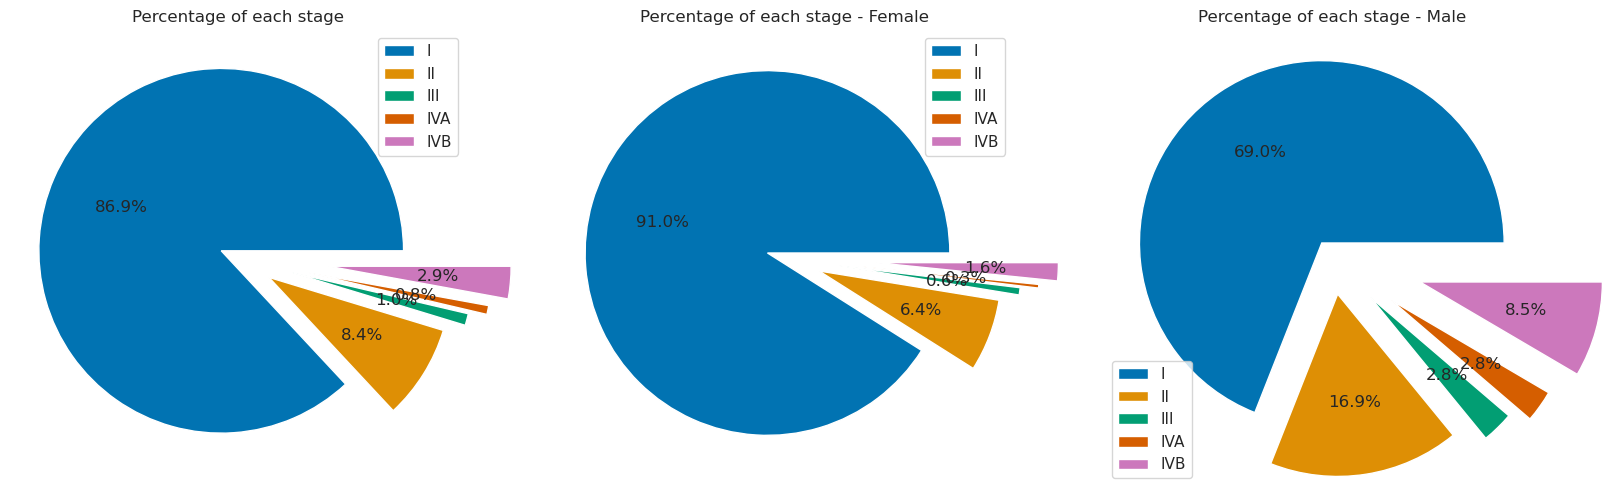

In [190]:
sns.set_palette("colorblind")
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

order = ["I", "II", "III", "IVA", "IVB"]  

# Pie chart for Stage
stage = df['Stage'].value_counts().sort_index()
stage.plot(kind='pie', autopct='%0.1f%%', explode=[0.1, 0.2, 0.3, 0.4, 0.5], labels=None, ax=axes[0])
axes[0].set_title('Percentage of each stage')
axes[0].legend(stage.index)
axes[0].set_ylabel('')

# Pie chart for Stage - Female
stage_f = df_female['Stage'].value_counts().sort_index()
stage_f.plot(kind='pie', autopct='%0.1f%%', explode=[0.1, 0.2, 0.3, 0.4, 0.5], labels=None, ax=axes[1])
axes[1].set_title('Percentage of each stage - Female')
axes[1].legend(stage.index)
axes[1].set_ylabel('')

# Pie chart for Stage - Male
stage_m = df_male['Stage'].value_counts().sort_index()
stage_m.plot(kind='pie', autopct='%0.1f%%', explode=[0.1, 0.2, 0.3, 0.4, 0.5], labels=None, ax=axes[2])
axes[2].set_title('Percentage of each stage - Male')
axes[2].legend(stage.index)
axes[2].set_ylabel('')

plt.show()

Conclusions:
 - The highest stage by percentage is Stage I with 86.% of the total population having this diagnosis. This is even higher in the female population with 91% having the lowest stage of cancer at diagnosis.
 - This percentage is lower in the male population with 69% being diagnosed as Stage I. (However it is worth remembering the relatively small sample size of men in the dataset).
 - Males have higher percentages of the later stage cancers. This could be for a number of reasons including how the cancer symptoms present, a tendency for females to seek treatment earlier or a pathological reason.

Is there a difference in the percentage of females who have a recurrence and males who have a recurrence?

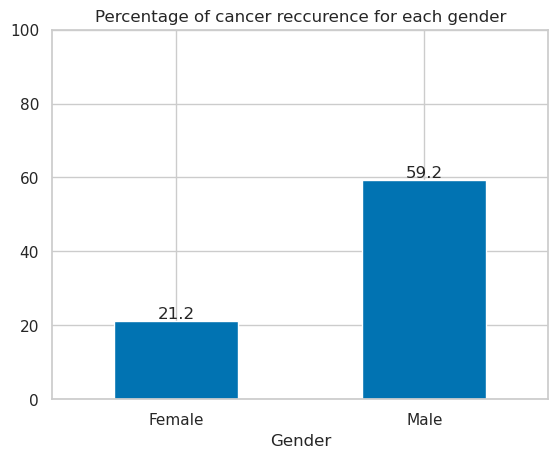

In [192]:
female_percent = round((df_female['Recurred_value'].sum() / df_female['Recurred_value'].count()) *100, 1)
male_percent = round((df_male['Recurred_value'].sum() / df_male['Recurred_value'].count()) *100, 1)
percentages = pd.DataFrame({'Gender':['Female', 'Male'], 'Percentage':[female_percent, male_percent]})
ax = percentages.plot.bar(x='Gender', y='Percentage', rot=0, legend=None)
ax.set_ylim([0, 100])
ax.set_title('Percentage of cancer reccurence for each gender')
ax.bar_label(ax.containers[0], label_type='edge');

Conclusions:
 - 59.2% of the male patients had a recurrence compared to only 21.2% of the females. This could perhaps be to do with the male patients having higher rates of later stage cancer. (It is worth noting again the relatively small sample size of men in the dataset).

Do older patients tend to have higher stages of cancer? Do older patients have higher rates of recurrence?

In [84]:
# Create filtered dataframes for Recurred Yes/No
df_recur_yes = df[df['Recurred']=='Yes']
df_recur_no = df[df['Recurred']=='No']

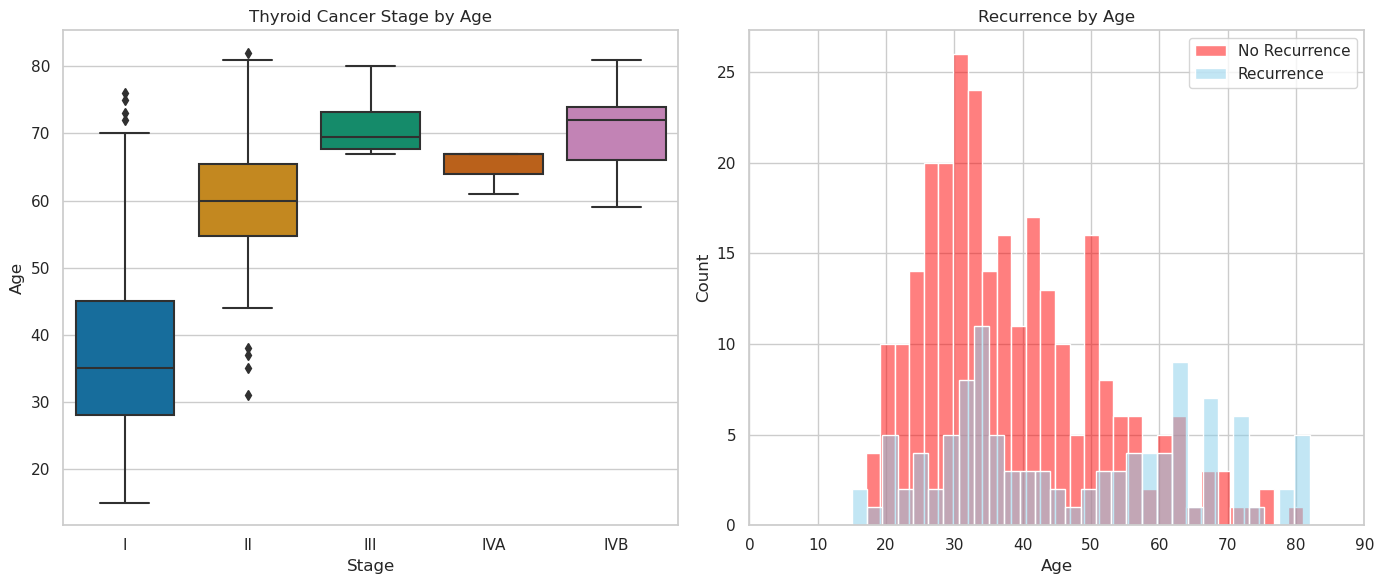

In [216]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Box Plot of stages by age
order = ["I", "II", "III", "IVA", "IVB"]
sns.boxplot(x='Stage', y='Age', data=df, order=order, ax=ax[0])
ax[0].set_title('Thyroid Cancer Stage by Age')

# Histogram of recurrences by age
sns.histplot(df_recur_no['Age'], color="red", label="No Recurrence", bins=30, alpha =0.5,ax=ax[1])
sns.histplot(df_recur_yes['Age'], color="skyblue", label="Recurrence", bins=30, alpha=0.5, ax=ax[1])
ax[1].set_title('Recurrence by Age')
ax[1].set_xlim(0,90)

plt.legend()
plt.tight_layout()
plt.show()

Conclusions:
 - There is a clear correlation between age and stage of cancer with older age correlating with a higher stage of cancer.
 - Those with stage I tend to be between 28 and 45, however we can see this stage has by far the greatest overall range and also several older outliers.
 - Those with stage II again have several outliers although this time in the younger age range. The interquartile range (IQR) for this stage is 55 to 65 (this tells us the spread of the middle half of the distribution)
 - Stages III, IVA and IVA have no outliers and have only been diagnosed in those over 59 years old. They also have narrower IQRs and overall ranges.
 - There is a peak in age in the 30s for both those whose cancer recurred and whose didn't, however this is more indicative of the average age of diagnosis rather than showing anything about recurrence rates.
 - We can see that as we get to age 60 and above the recurred count is higher than the no recurrence count which does suggest a higher likelihood of recurrence in older age, however a larger sample size would be needed to conclude this as otherwise the data is fairly spread out.
 - The scattergraph below shows these 3 variables plotted on one chart.

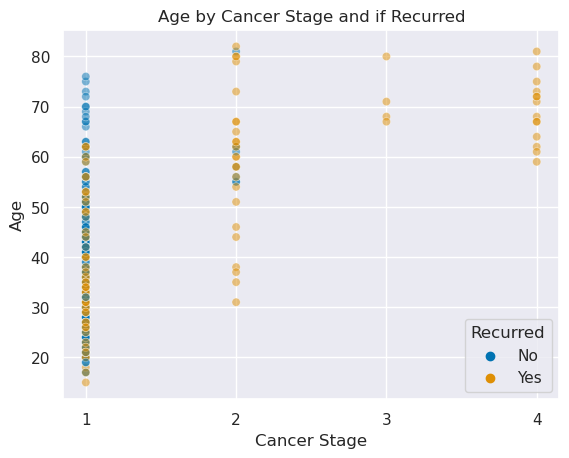

In [219]:
sns.set(palette='colorblind')
sns.scatterplot(data=df, x='Stage_value', y='Age', alpha=0.5, hue='Recurred')
plt.title('Age by Cancer Stage and if Recurred')
plt.xlabel('Cancer Stage')
plt.ylabel('Age')
plt.xticks([1,2,3,4])
plt.show();

Is there a link between thyroid function and whether the cancer recurs? 

In [262]:
# Create a dataframe to calculate percentages for each Thyroid Function
function_group = df.groupby(['Thyroid Function', 'Recurred'])['Recurred'].count().unstack()
function_group.fillna(0,inplace=True)
function_group['Percent Yes'] =  function_group['Yes'] / (function_group['Yes'] + function_group['No']) *100
function_group['Percent No'] =  function_group['No'] / (function_group['Yes'] + function_group['No']) *100
function_group_percent = function_group.loc[:, ['Percent Yes', 'Percent No']]
function_group_count = function_group.loc[:, ['Yes', 'No']]

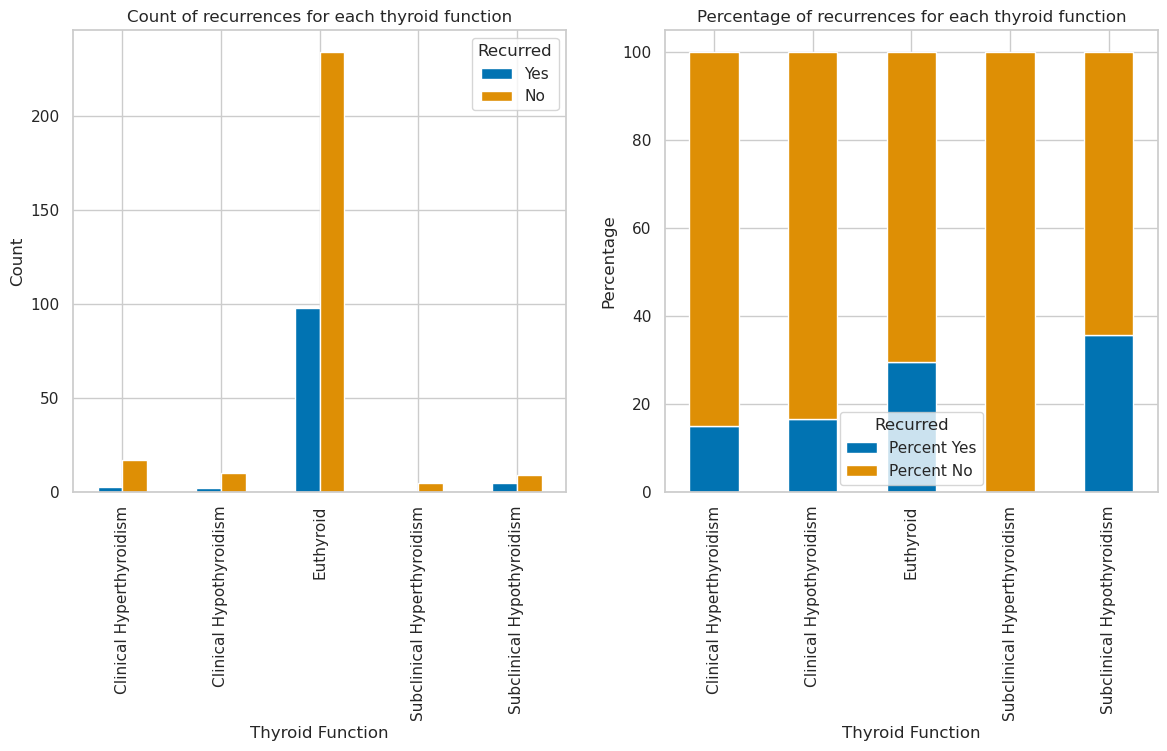

In [264]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart of count
function_group_count.plot.bar(ax=ax[0])
ax[0].set_title('Count of recurrences for each thyroid function')
ax[0].set_ylabel('Count');

# Bar chart of percentage
function_group_percent.plot.bar(ax=ax[1], stacked=True)
ax[1].set_title('Percentage of recurrences for each thyroid function')
ax[1].set_ylabel('Percentage');

Conclusion:
- It is interesting to note that those with Subclinical Hyperthyroidism had no recurrences whereas those with Subclinical Hypothyroidism had the highest percent of recurrences at 36%.
- The largest Thyroid Function group in the data is Euthyroid (normal thyroid function) and 30% of these patients had a recurrence. This is the second largest percent and therefore suggests that having abnormal thyroid function is not necessarily a good indicator for whether the cancer will recur. 

How many patients had metastases at the time of diagnosis? Is there a link between metastases and whether the cancer recurs?

In [228]:
# Create a dataframe to calculate percentages for each metastases
met_group = df.groupby(['Metastases (M)', 'Recurred'])['Recurred'].count().unstack()
met_group.fillna(0,inplace=True)
met_group['Percent Yes'] =  met_group['Yes'] / (met_group['Yes'] + met_group['No']) *100
met_group['Percent No'] =  met_group['No'] / (met_group['Yes'] + met_group['No']) *100
met_group_count = met_group.loc[:, ['Yes', 'No']]
met_group_percent = met_group.loc[:, ['Percent Yes', 'Percent No']]

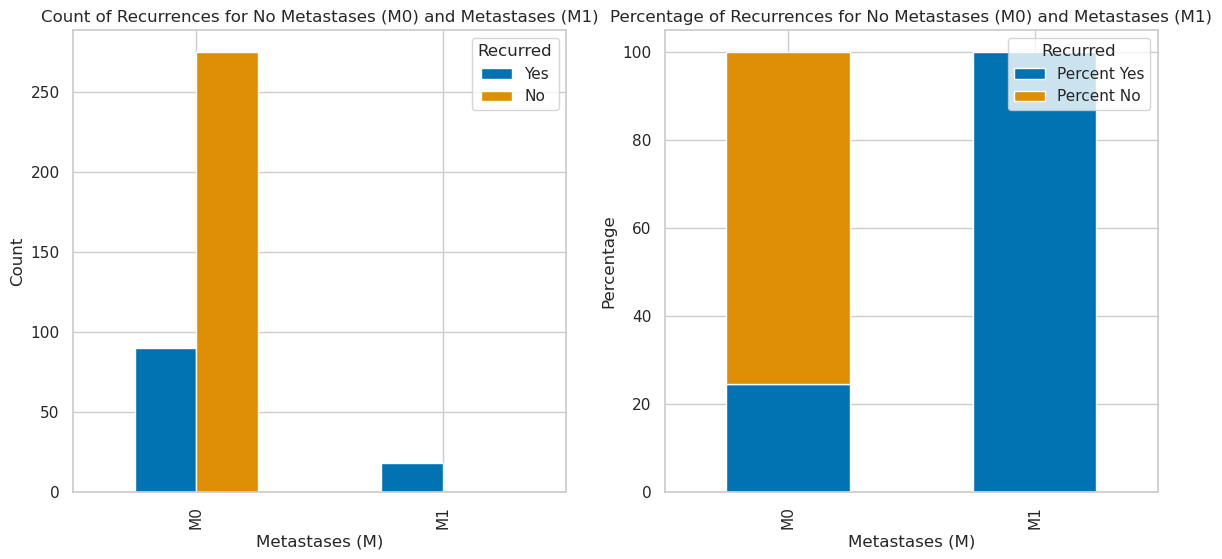

In [250]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart of count of metastases
met_group_count.plot.bar(ax=ax[0])
ax[0].set_title('Count of Recurrences for No Metastases (M0) and Metastases (M1)')
ax[0].set_ylabel('Count');

# Bar chart of percent of recurrence by metastases
met_group_percent.plot.bar(ax=ax[1], stacked=True)
ax[1].set_title('Percentage of Recurrences for No Metastases (M0) and Metastases (M1)')
ax[1].set_ylabel('Percentage');

Conclusion:
- From the count chart we can see that only a very small amount of people presented with metastases (18 of 383 or 5%). This suggests that most thyroid cancer is detected before it has spread. 
- However, we can see that 100% of these people had a recurrence (this would be expected as the cancer has already spread beyond the thyroid) 
- In contrast the percentage of those with no metastases having a recurrence is 25%. This suggests a quarter of those who initially have no metastases will have a recurrence of their cancer. 

Is there a link between tumour type and whether the cancer recurs?

In [236]:
# Create a dataframe to calculate percentages for each tumour type
tumour_group = df.groupby(['Tumour (T)', 'Recurred'])['Recurred'].count().unstack()
tumour_group.fillna(0,inplace=True)
tumour_group['Percent Yes'] =  tumour_group['Yes'] / (tumour_group['Yes'] + tumour_group['No']) *100
tumour_group['Percent No'] =  tumour_group['No'] / (tumour_group['Yes'] + tumour_group['No']) *100
tumour_group_count = tumour_group.loc[:, ['Yes', 'No']]
tumour_group_percent = tumour_group.loc[:, ['Percent Yes', 'Percent No']]

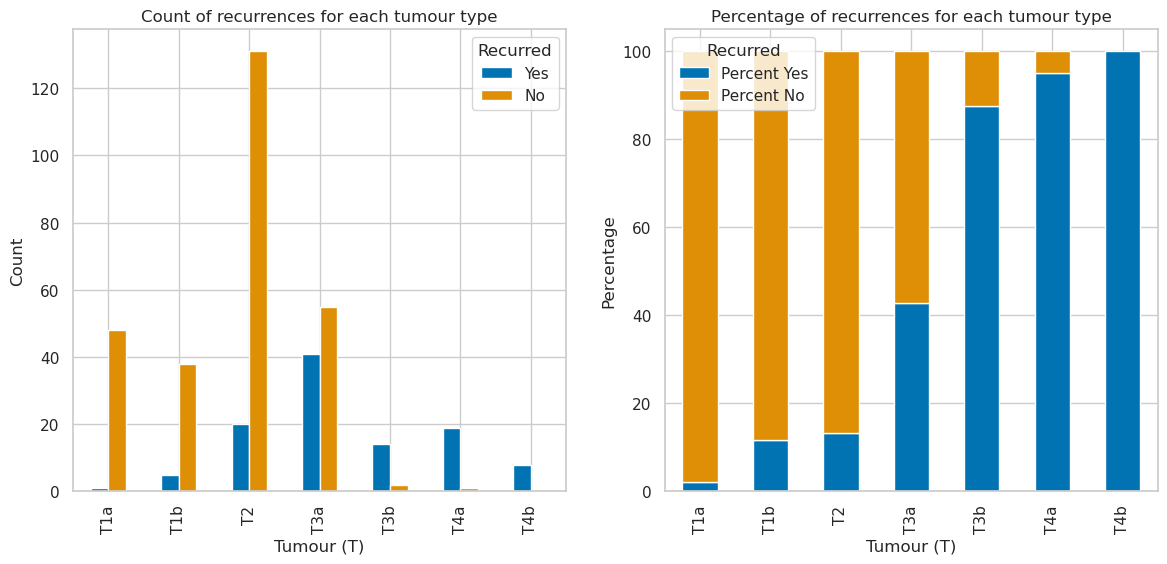

In [252]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart of count of recurrence for each tumour type
tumour_group_count.plot.bar(ax=ax[0])
ax[0].set_title('Count of recurrences for each tumour type')
ax[0].set_ylabel('Count');

# Bar chart of percent of recurrence for each tumour type
tumour_group_percent.plot.bar(ax=ax[1], stacked=True)
ax[1].set_title('Percentage of recurrences for each tumour type')
ax[1].set_ylabel('Percentage');

Conclusion:
- T2 tumours are the most common in the dataset with 151 overall (39%).
- Overall 28 patients had a stage 4 tumour, and as would be expected only 1 of these (4% of the T4 patients) did not have a recurrence. 
- In contrast of the 92 patients with a stage 1 tumour 93% did not have a recurrence.  
- There is a clear correlation between the lower stage tumours being less likely to have a recurrence and the higher stage tumours having a much greater chance of recurrence. 

## Overall Conclusion and Further Exploration
- Analysis of the dataset shows that certain clinicopathologic features do correlate with incidences of thyroid cancer recurrences; gender, age, cancer stage, metastases and tumour type are related to thyroid cancer recurrence. Thyroid function however does not have a clear correlation. 
- It would be useful to looks at every single variable in the dataset to calculate the percentages of recurrence and no recurrence (as above for Metastases and Tumour types).
- A predictive model could be created using this information to determine the likelihood of recurrence for a patient based on the clinicopathologic features of their thyroid cancer. 

## References
Image by Ed Uthman, MD - https://www.flickr.com/photos/euthman/481523439/, CC BY-SA 2.0, https://commons.wikimedia.org/w/index.php?curid=2047540

Borzooei,Shiva and Tarokhian,Aidin. (2023). Differentiated Thyroid Cancer Recurrence. UCI Machine Learning Repository. https://doi.org/10.24432/C5632J.

https://www.cancer.net/cancer-types/thyroid-cancer/stages

https://www.cancerresearchuk.org/about-cancer/thyroid-cancer/stages-types/tnm-staging

## Glossary

<dl>
  <dt>Adenopathy</dt>
  <dd>The swelling of the glands.</dd>
  <dt>Focality</dt>
  <dd>Multi-Focal: the simultaneous presence of more than 1 tumor focus within the thyroid gland.</dd>
  <dd>Uni-Focal: cancer can be seen only in one area in the thyroid gland.</dd>
  <dt>Goiter</dt>
  <dd>Any enlarged thyroid gland.</dd>
  <dt>Metastases (M)</dt>
  <dd>Refers to the lymph nodes.</dd>
  <dd>M0: the cancer hasn’t spread to another part of the body.</dd> 
  <dd>M1: the cancer has spread to another part of the body.</dd>
  <dt>Nodes (N)</dt>
  <dd>Describes whether the cancer has spread to a different part of the body.</dd>
  <dd>N0: no evidence of cancer in the regional lymph nodes.</dd> 
  <dd>N1: Cancer has spread to the lymph nodes.</dd>
  <dd>N1a: Cancer has spread to the lymph nodes around the thyroid (called the central compartment).</dd>
  <dd>N1b: Cancer has spread beyond the central compartment, including unilateral cervical, bilateral cervical, contralateral cervical, or mediastinal lymph nodes.</dd>
  <dt>Pathology</dt>
  <dd>Follicular: Thyroid carcinoma with follicular differentiation but no papillary nuclear features.</dd>
  <dd>Hurthel cell: characterised by the presence of Hurthle cells, represents about 5% of all differentiated thyroid carcinoma.</dd> 
  <dd>Micropapillary: a subtype of papillary carcinoma that included tumors with less than 10mm diameter.</dd>
  <dd>Papillary: the most common type of malignant thyroid carcinom - tend to have a predominance of papillary structures.</dd>
  <dt>Stage</dt>
  <dd>I (under age 55): a tumour (any T) with or without spread to lymph nodes (any N) and no distant metastasis (M0).</dd>
  <dd>I (over age 55): any small tumour (T1) with no spread to lymph nodes (N0) and no metastasis (M0).</dd> 
  <dd>II (under age 55): a tumour (any T) with any metastasis (M1) regardless of whether it has spread to the lymph nodes (any N).</dd>
  <dd>II (over age 55): a larger, noninvasive tumor (T2) with no spread to lymph nodes (N0) and no metastasis (M0).</dd>
  <dd>III: a tumor larger than 4 cm but still contained in the thyroid (T3) with no spread to lymph nodes (N0) and no metastasis (M0). Or, any localized tumor (T1, T2, or T3) with spread to the central compartment of lymph nodes (N1a) but no distant spread (M0).</dd> 
  <dd>IVA: a tumor that has spread to nearby structures (T4a), regardless of whether it has spread to the lymph nodes (any N), but it has not spread to distant places (M0). Or, this describes a localized tumor (T1, T2, or T3) with lymph node spread beyond the central compartment (N1b) but no distant spread (M0).</dd>
  <dd>IVB: a tumor that has spread beyond nearby structures (T4b), regardless of spread to lymph nodes (any N), but no distant spread (M0).</dd>
  <dd>IVC: all tumors (any T, any N) when there is evidence of metastasis (M1).</dd>
  <dt>Thyroid Function</dt>
  <dd>Hyperthyroidism: the thyroid creates and releases more hormones than you need.</dd>
  <dd>Hypothyroidism: the thyroid doesn’t create and release enough thyroid hormones.</dd> 
  <dd>Euthyroid: normal thyroid gland function.</dd>
  <dd>Subclinical Hyperthyroidism: low or undetectable thyroid-stimulating hormone (TSH) level with normal thyroxine (T4) and triiodothyronine (T3) levels.</dd>
  <dd>Subclinical Hypothyroidism: elevated thyroid-stimulating hormone (TSH) levels with normal levels of thyroxine (T4).</dd>
  <dt>Tumour (T)</dt>
  <dd>Describes the size of the tumour.</dd>
  <dd>T0: no sign of a cancer.</dd> 
  <dd>T1a: the cancer is completely inside the thyroid. It is 1cm across or smaller.</dd>
  <dd>T1b: the cancer is completely inside the thyroid. It is between 1cm and 2cm across.</dd>
  <dd>T2: the cancer is completely inside the thyroid. It is more than 2cm but no greater than 4cm across.</dd>
  <dd>T3a: the cancer is more than 4cm across. It is still completely inside the thyroid.</dd>
  <dd>T3b: the cancer is any size. It has grown outside the thyroid into one or more of the muscles beside the thyroid (strap muscles).</dd>
  <dd>T4a: the cancer has grown outside the thyroid into nearby soft tissue, such as the larynx, trachea, oesophagus or the recurrent laryngeal nerve.</dd>
  <dd>T4b: the cancer has grown outside the thyroid into the area surrounding the bones of the spine or one of the main blood vessels in the neck area.</dd>  
</dl>